#Linear Regression 2

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
modelName = LinearRegression()

In [11]:
fitur = np.array([[3],[4],[5],[1]])
target = np.array([4,2,4,1])
print(fitur.shape,'\n',target.shape)

(4, 1) 
 (4,)


In [12]:
modelName.fit(fitur,target)
modelName.predict(fitur)

array([2.6, 3.2, 3.8, 1.4])

In [13]:
print(modelName.intercept_)
print(modelName.coef_)

0.7999999999999998
[0.6]


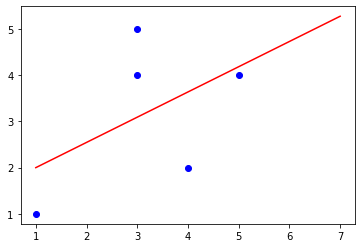

In [6]:
#new data dengan data dummy (1-7 sebanyak 20 data)
dummy_data = np.linspace(1,7,20)
#resape menjadi matrix 20 1
dummy_data = np.reshape(dummy_data,(20,1))
output = modelName.predict(dummy_data)
#data asli
plt.plot(fitur,target,'bo')
#new data
plt.plot(dummy_data,output,'-r')

In [ ]:
from sklearn import datasets

In [ ]:
data = datasets.load_diabetes()
#melihat fitur
fitur = np.array(data.data)
#melihat target
target = data.target
print(target.shape,'\n',fitur.shape)

(442,) 
 (442, 10)


In [ ]:
fitur1 = fitur[:,3:]
# training
modelName.fit(fitur1,target)
# testing
# modelName.predict(fitur1)

LinearRegression()

In [ ]:
print(modelName.intercept_)
print(modelName.coef_)

152.13348416289583
[ 386.09686308 -925.89395408  663.92266084   81.40649912   79.46674232
  957.01924623  121.55123356]


##Rumus Multivariate
$y = w_0+w_1x_1+w_2x_2+w_3x_3+w_4x_4+w_5x_5+w_6x_6+w_7x_7$
$y = 152+386x_1+-925x_2+663x_3+81x_4+79x_5+957x_6+121x_7$

##R - Square
- $SStotal =  \sum_{i=1}^{n} (y_1 - \overline{y})^2 $<br>
- $SSresidu = \sum_{i=1}^{n} (y_1 - f(x_1))^2$<br>
- $R^2 = 1 - SSresidu/SStotal$

Keterangan :
- $f(x_1)$ = data ke i
- $\overline{y}$ = rata rata target
- $y$ = target data

##Polinomynal Regression
Bentuk grafik melengkung
- Rumus polinomynal Regression<br>
$y = w_0 + w_1x + w_2x^2$ (Univariate Quadratic Regression)<br>
$y = w_0 + w_1x_1 + w_2x_2 x_2 + x2_1$ (Multivariate)
- Stochastic Gradien (update bobot)<br>
$w_j = w_j - \lambda(f(x^i)-y^i)x^i_j$

In [ ]:
data= np.array([[1],[2],[4],[3],[5]])
target = np.array([1,3,3,2,5])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
fitur = PolynomialFeatures(degree=2)
data2 = fitur.fit_transform(data)
data2

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  4., 16.],
       [ 1.,  3.,  9.],
       [ 1.,  5., 25.]])

In [ ]:
modelName.fit(data2,target)
print(modelName.intercept_,modelName.coef_)

1.3999999999999897 [ 0.         -0.05714286  0.14285714]


### Contoh Soal Polynominal Regression

In [ ]:
data = np.array([[1],[2],[4],[3],[5]])
target = np.array([1,3,3,2,5])
# trasnformasi data
fitur = PolynomialFeatures(degree=2)
data2 = fitur.fit_transform(data)
print(data2)

[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  4. 16.]
 [ 1.  3.  9.]
 [ 1.  5. 25.]]


In [ ]:
# buat class polynomial regression dan print iterasi di setiap epoch
import random
class PolynomialRegression:
    def __init__(self, lr=0.01, epoch=1, batch_size=4):
        self.lr = lr #learning rate
        self.epoch = epoch #jumlah iterasi
        self.batch_size = batch_size #jumlah data yang digunakan dalam 1 iterasi
        self.beban = None #beban

    def fit(self, X, y):
        self.beban = np.zeros(X.shape[1])
        for i in range(self.epoch):
            indexes = random.sample(range(0, len(X)), self.batch_size)
            Xs = np.take(X, indexes, axis=0)
            ys = np.take(y, indexes, axis=0)
            N = len(Xs)
            y_pred = np.dot(Xs, self.beban)
            error = y_pred - ys
            self.beban = self.beban - (self.lr/N)*np.dot(Xs.T, error)
            print('epoch: ', i, 'beban: ', self.beban)

    def predict(self, X):
        y_predicted = np.dot(X, self.beban)
        return y_predicted

In [ ]:
model = PolynomialRegression(lr=0.1, epoch=100, batch_size=3)
model.fit(data2, target)
y_pred = model.predict(data2)
print('Predict: ', y_pred)

epoch:  0 beban:  [0.26666667 1.06666667 4.8       ]
epoch:  1 beban:  [ -4.45333333 -15.08444444 -52.85777778]
epoch:  2 beban:  [  90.45540741  393.84696296 1764.51185185]
epoch:  3 beban:  [ -2284.58746667  -9544.67420247 -42911.33403457]
epoch:  4 beban:  [  65810.95287276  287395.87933267 1306247.29539523]
epoch:  5 beban:  [ -1149489.83291243  -3985054.54273374 -14349186.85516758]
epoch:  6 beban:  [2.19504265e+07 9.66403353e+07 4.42584266e+08]
epoch:  7 beban:  [-3.89588402e+08 -1.35022648e+09 -4.85925253e+09]
epoch:  8 beban:  [4.75171582e+09 1.61074023e+10 5.71503017e+10]
epoch:  9 beban:  [-5.58009681e+10 -1.89484597e+11 -6.73066001e+11]
epoch:  10 beban:  [5.83632222e+11 2.05368472e+12 7.53959122e+12]
epoch:  11 beban:  [-9.70944145e+12 -4.09533465e+13 -1.85605490e+14]
epoch:  12 beban:  [8.60680673e+13 2.02826692e+14 4.74380866e+14]
epoch:  13 beban:  [-3.87755941e+14 -1.45067591e+15 -5.56690440e+15]
epoch:  14 beban:  [5.46756335e+15 1.84387554e+16 6.50990653e+16]
epoch:  